In [3]:
f = open("project.txt", 'r', encoding='utf-8')
all_chat = []
for line in f:
    all_chat.append(line.replace('\n',''))
    
f.close()

all_chat[:10]

['만두!!, 김진성, 김태정, 코광일, 빽가, ... 님과 카카오톡 대화',
 '저장한 날짜 : 2019-09-30 11:50:09',
 '',
 '--------------- 2019년 8월 17일 토요일 ---------------',
 '[김태정] [오후 5:46] 사진',
 '[고릴] [오후 5:52] 뭐야 이건',
 '[에로박] [오후 5:53] 싸우디깝',
 '[김태정] [오후 6:01] 여기 맛이 확실히 있는듯',
 '[코광일] [오후 6:06] 쌀국수?ㅋ',
 '[김태정] [오후 6:09] ㅇㅇ청화병원앞']

In [7]:
err = []
name = []
time = []

for chat in all_chat:
    temp = chat.split("] ")
    if len(temp) == 3:
        n = temp[0][1:]
        t = temp[1][1:]
        name.append(n)
        time.append(t)
    else:
        err.append(chat)

In [18]:
time[200:250]

['오후 12:07',
 '오후 12:12',
 '오후 12:19',
 '오후 12:21',
 '오후 12:21',
 '오후 12:27',
 '오후 12:27',
 '오후 12:30',
 '오후 12:30',
 '오후 12:31',
 '오후 12:31',
 '오후 12:45',
 '오후 12:54',
 '오후 12:55',
 '오후 12:55',
 '오후 4:13',
 '오후 4:14',
 '오후 4:14',
 '오후 4:14',
 '오후 4:15',
 '오후 4:15',
 '오후 4:15',
 '오후 4:17',
 '오후 4:17',
 '오후 4:17',
 '오후 4:19',
 '오후 4:19',
 '오후 4:19',
 '오후 4:19',
 '오후 4:23',
 '오후 4:26',
 '오후 4:26',
 '오후 4:26',
 '오후 4:47',
 '오전 9:01',
 '오전 9:01',
 '오전 9:01',
 '오전 9:02',
 '오전 9:02',
 '오전 9:02',
 '오전 9:02',
 '오전 9:02',
 '오전 9:02',
 '오전 9:02',
 '오전 9:19',
 '오전 9:55',
 '오전 9:56',
 '오전 10:09',
 '오전 10:10',
 '오전 10:10']

In [11]:
import datetime

In [16]:
datetime.datetime(2018, 1, 1, 23, 30)
# 00:00 ~ 23:59

datetime.datetime(2018, 1, 1, 23, 30)

In [26]:
dtime = []
for t in time:
    temp = t.replace(":", " ").split(" ")
    h = int(temp[1])
    m = int(temp[2])
    
    dtime.append(datetime.datetime(2018,1,1,h,m))
    

In [27]:
from collections import Counter

In [31]:
temp = Counter(dtime).most_common(100000)

In [39]:
stime = sorted(temp, key = lambda x: x[0]) # sorted 자동 정렬

In [43]:
t, c = zip(*stime)

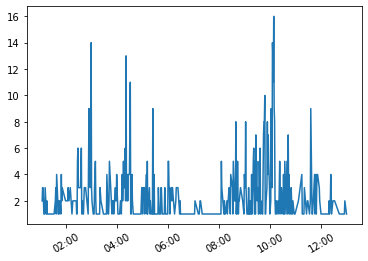

In [44]:
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot_date(t,c,fmt="-") # fmt 는 무엇으로 그릴지 정한다
ax.xaxis.set_major_formatter(DateFormatter('%H:%M')) # DateFormatter 시간과 분만 넣을 수 있게 셋팅
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

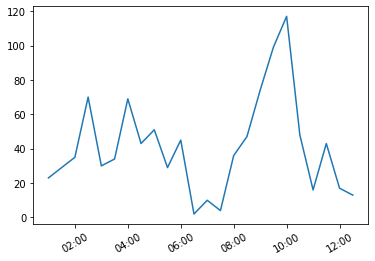

In [50]:
dtime = []
bin_size = 30
for t in time:
    temp = t.replace(":", " ").split(" ")
    h = int(temp[1])
    m = int(temp[2])// bin_size * bin_size
    
    dtime.append(datetime.datetime(2018,1,1,h,m))
temp = Counter(dtime).most_common(100000)
stime = sorted(temp, key = lambda x: x[0]) # sorted 자동 정렬
t, c = zip(*stime)

fig, ax = plt.subplots()
plt.plot_date(t,c,fmt="-") # fmt 는 무엇으로 그릴지 정한다
ax.xaxis.set_major_formatter(DateFormatter('%H:%M')) # DateFormatter 시간과 분만 넣을 수 있게 셋팅
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.savefig('fig_kakao_time_dist.pdf', format='pdf', bbox_inches='tight')